In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

protoss_data = read_csv('../Output/ProtossMarch.csv', header=0, index_col=False)
demoP = read_csv('../Output/wedDemoProtoss.csv', header=0, index_col=False)
display(demoP)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,233,Eternal Empire LE,us,926,P,Z,0.0,1,0,Player 1 - Stats (Protoss),12,12,15,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,233,Eternal Empire LE,us,926,P,Z,116.2,480,30,Player 1 - Stats (Protoss),13,14,15,35,643,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,233,Eternal Empire LE,us,926,P,Z,124.6,960,60,Player 1 - Stats (Protoss),15,16,23,5,783,200,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,233,Eternal Empire LE,us,926,P,Z,196.0,1440,90,Player 1 - Stats (Protoss),17,18,23,85,979,275,1350,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,233,Eternal Empire LE,us,926,P,Z,165.2,1920,120,Player 1 - Stats (Protoss),19,20,23,415,923,200,1525,0,0,16,67,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,233,Eternal Empire LE,us,926,P,Z,137.2,2400,150,Player 1 - Stats (Protoss),20,21,23,50,895,675,1725,0,0,60,134,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6,233,Eternal Empire LE,us,926,P,Z,168.0,2880,180,Player 1 - Stats (Protoss),22,23,23,175,951,700,1900,0,0,116,156,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,22,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7,233,Eternal Empire LE,us,926,P,Z,182.0,3360,210,Player 1 - Stats (Protoss),24,27,31,155,923,700,2250,0,0,53,313,175,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,24,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
8,233,Eternal Empire LE,us,926,P,Z,177.8,3840,240,Player 1 - Stats (Protoss),27,33,46,50,1035,350,2900,100,0,94,313,175,25,25,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,27,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
9,233,Eternal Empire LE,us,926,P,Z,140.0,4320,270,Player 1 - Stats (Protoss),31,39,46,150,1343,350,3350,200,0,110,335,100,200,50,0,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,31,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [2]:
new_data = pd.concat([protoss_data.reset_index(drop=True), demoP.reset_index(drop=True)], axis=0, ignore_index=True)
display(new_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,0,World of Sleepers LE,us,437,P,T,0.0,1,0,Player 2 - Harstem (Protoss),12,12,15,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,World of Sleepers LE,us,437,P,T,155.4,480,30,Player 2 - Harstem (Protoss),13,14,15,50,727,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,World of Sleepers LE,us,437,P,T,183.4,960,60,Player 2 - Harstem (Protoss),15,16,23,115,867,125,1250,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,World of Sleepers LE,us,437,P,T,148.4,1440,90,Player 2 - Harstem (Protoss),18,19,23,135,951,200,1475,0,0,12,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,World of Sleepers LE,us,437,P,T,152.6,1920,120,Player 2 - Harstem (Protoss),19,20,23,65,895,600,1525,0,0,56,111,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76362,233,Eternal Empire LE,us,926,P,Z,163.8,18720,1170,Player 1 - Stats (Protoss),77,172,196,900,2491,0,15900,5875,9875,230,1097,0,3650,3000,4025,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,77,17,0,0,2,0,1,14,1,0,1,1,1,8,1,1,1
76363,233,Eternal Empire LE,us,926,P,Z,201.6,19200,1200,Player 1 - Stats (Protoss),72,175,173,645,1595,500,15500,6300,11200,368,963,0,3700,3050,4225,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,72,17,0,0,2,0,1,15,1,0,1,1,1,8,1,4,1
76364,233,Eternal Empire LE,us,926,P,Z,196.0,19680,1230,Player 1 - Stats (Protoss),72,181,181,350,1679,400,15975,6675,11700,342,873,0,3850,3200,4425,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,72,17,0,0,2,0,1,18,1,0,1,1,1,8,1,4,1
76365,233,Eternal Empire LE,us,926,P,Z,50.4,20160,1260,Player 1 - Stats (Protoss),72,171,189,770,1483,400,15475,6075,12300,674,918,0,3650,3000,4625,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,72,18,0,0,2,0,1,14,1,0,1,1,1,8,1,3,1


In [3]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(new_data) if x not in no_standardize]

#Standardizing these columns
stand = new_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
protoss_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=new_data.index)

#One-hot Encoding the categorical variables
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(new_data['map_name'], prefix='Map'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(new_data['region'], prefix='Region'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(new_data['enemy_race'], prefix='Enemy'))
protoss_data_standardized = protoss_data_standardized.join(new_data['win'])

#Displaying first and last 5 rows
display(protoss_data_standardized.head(5), protoss_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-2.547693,-1.444397,-1.203894,-1.134872,-0.481827,-2.105077,-1.391898,-1.122629,-0.898177,-0.452576,-0.559436,-1.352333,-0.721541,-0.833821,-0.798137,-0.405429,-0.462618,-0.396678,-1.380364,-0.190932,-0.281142,-2.206291,-0.433467,-0.213047,-0.270594,-0.335035,-0.86235,-0.139201,-0.349194,-0.49333,-0.18544,-0.157564,0.0,-1.159144,-0.624825,-0.394818,-0.339935,-0.392009,-1.444387,-1.203971,0.0,-0.53263,-1.04309,-0.614959,-0.548758,-0.651073,-0.597276,-0.131339,-0.592765,-1.116617,-0.177652,-1.215287,-0.581507,-0.545467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.395538,-1.394919,-1.167338,-1.134872,-0.481827,-1.121683,-1.002625,-1.113884,-0.898177,-0.452576,-0.559436,-1.352333,-0.721541,-0.833821,-0.798137,-0.405429,-0.462618,-0.396678,-1.380364,-0.190932,-0.281142,-2.206291,-0.433467,-0.213047,-0.270594,-0.335035,-0.86235,-0.139201,-0.349194,-0.49333,-0.18544,-0.157564,0.0,-1.159144,-0.624825,-0.394818,-0.339935,-0.392009,-1.394910,-1.056949,0.0,-0.53263,-1.04309,-0.614959,-0.548758,-0.651073,-0.597276,-0.131339,-0.592765,-1.116617,-0.177652,-1.215287,-0.581507,-0.545467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0.925850,-1.295964,-1.130782,-1.024877,-0.387567,-0.932308,-1.067504,-1.078903,-0.898177,-0.452576,-0.559436,-1.352333,-0.721541,-0.833821,-0.798137,-0.405429,-0.462618,-0.396678,-1.017175,-0.190932,-0.281142,-2.206291,-0.433467,-0.213047,-0.270594,-0.335035,-0.86235,-0.139201,-0.349194,-0.49333,-0.18544,-0.157564,0.0,-1.159144,-0.624825,-0.394818,-0.339935,-0.392009,-1.295956,-1.056949,0.0,-0.53263,-1.04309,-0.614959,-0.548758,-0.651073,-0.597276,-0.131339,-0.592765,-1.116617,-0.177652,-1.215287,-0.581507,-0.545467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0.262960,-1.147530,-1.075948,-1.024877,-0.358564,-0.818684,-0.872868,-1.039549,-0.898177,-0.452576,-0.538299,-1.232184,-0.721541,-0.833821,-0.798137,-0.4

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
76362,0.554631,1.771660,1.720582,1.353748,0.750797,1.264434,-1.391898,1.483449,2.021313,1.011730,-0.154311,1.643206,-0.721541,1.398255,1.512424,1.164748,0.057902,0.248804,0.798772,-0.190932,-0.281142,0.340035,-0.433467,-0.213047,-0.270594,-0.335035,0.686817,-0.139201,1.753996,6.471112,-0.18544,-0.157564,0.0,1.013099,-0.624825,0.970535,0.297569,-0.392009,1.771621,1.295401,0.0,-0.53263,1.709848,-0.614959,-0.200007,1.530005,0.29926,-0.131339,1.647323,0.89046,0.508161,0.895979,1.506608,-0.350942,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
76363,1.270552,1.524271,1.775416,1.037515,0.381010,0.052438,-0.094322,1.413487,2.232510,1.208207,0.088764,1.277297,-0.721541,1.428831,1.550933,1.242769,0.057902,0.248804,0.798772,-0.190932,-0.281142,0.340035,-0.433467,-0.213047,-0.270594,-0.335035,0.686817,-0.139201,1.753996,6.471112,-0.18544,-0.157564,0.0,1.013099,-0.624825,0.970535,0.297569,-0.392009,1.524236,1.295401,0.0,-0.53263,1.709848,-0.614959,-0.200007,1.685797,0.29926,-0.131339,1.647323,0.89046,0.508161,0.895979,1.506608,0.232635,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
76364,1.164490,1.524271,1.885084,1.147509,-0.046783,0.166063,-0.353837,1.496566,2.418860,1.282349,0.042967,1.031537,-0.721541,1.520560,1.666461,1.320791,0.057902,0.248804,0.798772,-0.190932,-0.281142,0.340035,-0.433467,-0.213047,-0.270594,-0.335035,0.686817,-0.139201,1.753996,6.471112,-0.18544,-0.157564,0.0,1.013099,-0.624825,0.970535,0.297569,-0.392009,1.524236,1.295401,0.0,-0.53263,1.709848,-0.614959,-0.200007,2.153170,0.29926,-0.131339,1.647323,0.89046,0.508161,0.895979,1.506608,0.232635,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
76365,-1.593132,1.524271,1.702304,1.257503,0.562278,-0.099061,-0.353837,1.409114,2.120700,1.371319,0.627755,1.154417,-0.721541,1.398255,1.512424,1.398812,0.057902,0.248804,0.798772,-0.190932,-0.281142,0.340035,-0.433467,-0.213047,-0.270594,

In [4]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_standardized) if x not in no_X]

Y = protoss_data_standardized['win']
X_standardized = protoss_data_standardized[yes_X]

In [5]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(protoss_data)
num_val = int(val_split * num_data)
num_train = int(train_split * num_data)
num_test = len(demoP)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)+1]
Y_test = Y[(num_val + num_train)+1:]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)+1]
X_standardized_test = X_standardized[(num_val + num_train)+1:]

In [6]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [7]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [8]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(61058, 1)
(15265, 1)
(44, 1)


In [9]:
print(X_standardized_train.shape)
print(X_standardized_val.shape)
print(X_standardized_test.shape)

(61058, 123)
(15265, 123)
(44, 123)


In [10]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_standardized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_standardized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_standardized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [11]:
val_performance = {}
performance = {}

#Window size = 1
Y_Time = []
timer = 21;
for i in range(0,len(Y_test)-1):
    Y_Time.append(timer)
    timer += 21
    
Y_demo_test = Y_test[1:]

In [16]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=19, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dropout(0.8))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1909/1909 [==============================] - 17s 9ms/step - loss: 0.7492 - binary_accuracy: 0.5013 - precision_1: 0.5053 - recall_1: 0.5215 - auc_1: 0.5041 - val_loss: 0.6909 - val_binary_accuracy: 0.5297 - val_precision_1: 0.5180 - val_recall_1: 0.5857 - val_auc_1: 0.5484s: 0.8939 - binary_accuracy: 0.5019 - precision_1: 0.4740 - recall_1: 0.5303 - auc_1: 0.50 - ETA: 11s - loss: 0.9003 - binary_accuracy: 0.4932 - precision_1: 0 - ETA: 10s - loss: 0.8364 - binary_accuracy: 0.4986 - precision_1: 0.5171 - recall_1: 0.5102 - auc_1: 0 - ETA: 9s - loss: 0.8319 -  - ETA: 4s - loss: 0.7729 - binary_accuracy: 0.5048 - precision_1: 0.5028 - recall_1: 0.5139 - auc_1 - ETA: 4s - loss: 0.7720 - binary_accuracy: 0.5041 - precision_1: 0.5035 - recall_1: 0.5098 - auc_1: 0.50 - ETA: 4s - loss: 0.7715 - binary_accuracy: 0.5044 - precision_1: - ETA: 3s - loss: 0.7646 - binary_accuracy: 0.5035 - precision_1: 0.5077 - recall_1: 0.5034 - auc_1: 0. - ETA: 3s - loss: 0.7637 - binary_accuracy: 0.5

1909/1909 [==============================] - 16s 8ms/step - loss: 0.6859 - binary_accuracy: 0.5392 - precision_1: 0.5449 - recall_1: 0.5230 - auc_1: 0.5644 - val_loss: 0.6827 - val_binary_accuracy: 0.5558 - val_precision_1: 0.5491 - val_recall_1: 0.5243 - val_auc_1: 0.5838950 - binary_accuracy: 0.5282 - precision_1: 0.4811 - recall_1: 0.5157 - a - ETA: 11s - loss: 0.6925 - binary_accuracy: 0.5258 - precision_1: 0.5213 - recall - ETA: 10s - loss: 0.6885 - binary_accuracy: 0.5339 - precision_1: 0.5554  - ETA: 9s - loss: 0.6843 - binary_accuracy: 0 - ETA: 7s - los - ETA: 2s - loss: 0.6868 - binary_accuracy: 0.5352 - precision_1: 0.5426 -  - ETA: 1s - loss: 0.6864 - binary_accuracy: 0.5372 - precision_1: 0.5416 - recall_1: 0.5190 - auc_1: 0.56 - ETA: 1s - loss: 0.6862 - binary_accuracy: 0.5376 - precision_1:
Epoch 12/100
1909/1909 [==============================] - 16s 8ms/step - loss: 0.6857 - binary_accuracy: 0.5394 - precision_1: 0.5446 - recall_1: 0.5292 - auc_1: 0.5644 - val_loss: 0.6

1909/1909 [==============================] - 16s 8ms/step - loss: 0.6789 - binary_accuracy: 0.5533 - precision_1: 0.5614 - recall_1: 0.5215 - auc_1: 0.5871 - val_loss: 0.6810 - val_binary_accuracy: 0.5564 - val_precision_1: 0.5530 - val_recall_1: 0.4961 - val_auc_1: 0.5859 0.6828 - binary_accuracy: 0.5697 - pre - ETA: 9s - loss: 0.6819 - binary_accuracy: 0.5499 - precision_1: 0.5829 - recall_1: 0.53 - ETA: 9s - loss: 0.6 - ETA: 4s - loss: 0.6 - ETA: 1s - loss: 0.6795 - binary_accuracy: 0.5493 - precision_1: 0.5588 -  - ETA: 0s - loss: 0.6790 - binary_accuracy: 0.5517 - precision_1: 0.5610 
Epoch 26/100
1909/1909 [==============================] - 16s 8ms/step - loss: 0.6770 - binary_accuracy: 0.5549 - precision_1: 0.5623 - recall_1: 0.5292 - auc_1: 0.5897 - val_loss: 0.6811 - val_binary_accuracy: 0.5560 - val_precision_1: 0.5501 - val_recall_1: 0.5177 - val_auc_1: 0.58550
Epoch 27/100
1909/1909 [==============================] - 16s 8ms/step - loss: 0.6769 - binary_accuracy: 0.5557 - p

In [18]:
simple_pred = simple_model.predict(test_generator)
simple_pred = pd.Series(simple_pred.flatten())

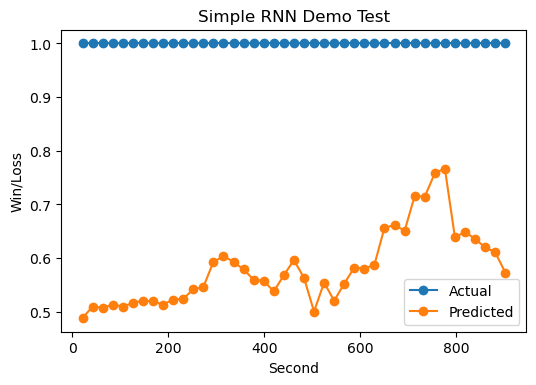

In [19]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, simple_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Simple RNN Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [12]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1909/1909 [==============================] - 17s 9ms/step - loss: 0.6980 - binary_accuracy: 0.5222 - precision: 0.5274 - recall: 0.5041 - auc: 0.5226 - val_loss: 0.6859 - val_binary_accuracy: 0.5419 - val_precision: 0.5492 - val_recall: 0.3656 - val_auc: 0.5661_accuracy: 0.5080 - precision: 0.5200 - recall: 0.6118 - - ETA: 9s - loss: 0.7041 - binary_accuracy: 0.5070 - precision: 0
Epoch 2/100
1909/1909 [==============================] - 16s 8ms/step - loss: 0.6898 - binary_accuracy: 0.5364 - precision: 0.5488 - recall: 0.4531 - auc: 0.5511 - val_loss: 0.6843 - val_binary_accuracy: 0.5441 - val_precision: 0.5528 - val_recall: 0.3664 - val_auc: 0.5752 - ETA: 5s -
Epoch 3/100
1909/1909 [==============================] - 17s 9ms/step - loss: 0.6868 - binary_accuracy: 0.5448 - precision: 0.5592 - recall: 0.4600 - auc: 0.5646 - val_loss: 0.6819 - val_binary_accuracy: 0.5561 - val_precision: 0.5657 - val_r

In [14]:
dense_pred = dense_model.predict(test_generator)
dense_pred = pd.Series(dense_pred.flatten())

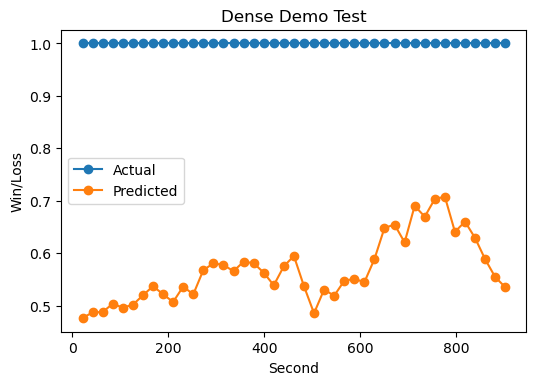

In [15]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, dense_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Dense Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [20]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.8))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1909/1909 [==============================] - 17s 9ms/step - loss: 0.6972 - binary_accuracy: 0.5144 - precision_2: 0.5187 - recall_2: 0.5136 - auc_2: 0.5203 - val_loss: 0.6867 - val_binary_accuracy: 0.5516 - val_precision_2: 0.5322 - val_recall_2: 0.7037 - val_auc_2: 0.5781inary_accuracy: 0.5098 - precision_2: 0.5245 - recall_2: 0.5817 - a - ETA: 6s - loss: 0.6984 - binary_accuracy: 0.5122 - precisio - ETA: 5s - loss: 0.6993 - binary_accuracy: 0.5111 - precision_2: 0.5136 - recall_2 - ETA: 1s - loss: 0.6979 - binary_a
Epoch 2/100
1909/1909 [==============================] - 16s 8ms/step - loss: 0.6888 - binary_accuracy: 0.5385 - precision_2: 0.5427 - recall_2: 0.5388 - auc_2: 0.5554 - val_loss: 0.6827 - val_binary_accuracy: 0.5650 - val_precision_2: 0.5439 - val_recall_2: 0.6981 - val_auc_2: 0.5938 - binary_accuracy: 0.5403 - precision_2: 0.5631 - recall_2 - ETA: 7s - los - ETA: 5s -
Epoch 3/100
1909/1909 [==============================] - 16s 9ms/step - loss: 0.6849 - binar

In [22]:
lstm_pred = lstm_model.predict(test_generator)
lstm_pred = pd.Series(lstm_pred.flatten())

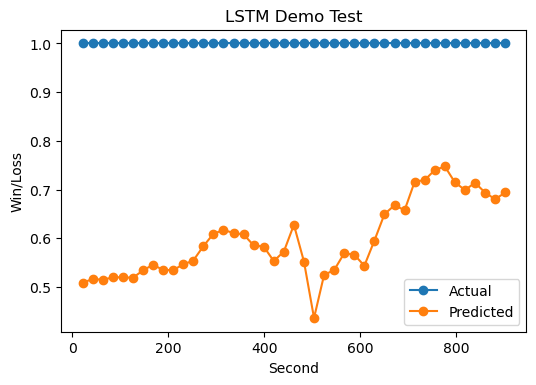

In [23]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, lstm_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('LSTM Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [24]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(12, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.5))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1909/1909 [==============================] - 17s 9ms/step - loss: 0.6980 - binary_accuracy: 0.5214 - precision_3: 0.5245 - recall_3: 0.5455 - auc_3: 0.5286 - val_loss: 0.6866 - val_binary_accuracy: 0.5480 - val_precision_3: 0.5349 - val_recall_3: 0.5979 - val_auc_3: 0.5676.7052 - binary_accuracy: 0.515 - ETA: 3s - loss: 0.6988 - binary_accuracy: 0.5205 - precision_3: 0.5223 - recall_3: 0.5487 - auc_3 - ETA: 2s - loss: 0.6995 - binary_accuracy: 0.5198 - precision_3: 0 - ETA: 1s - loss: 0.6993 - binary_accuracy: 0.5184 - precision_3: 0.5230 - recall_3: 0.5334 - auc_3: 0. - ETA: 1s - loss: 0.6992 - binary_accuracy: 0.5181 - precision_3: 0.5209 - reca - ETA: 0s - loss: 0.6981 - binary_accuracy: 0.5214 - precision_3: 0.5256 - recall_3: 0.5395 - auc - ETA: 0s - loss: 0.6977 - binary_accuracy: 0.5224 - precision_3: 0.5260 - recall_3: 
Epoch 2/100
1909/1909 [==============================] - 16s 8ms/step - loss: 0.6885 - binary_accuracy: 0.5396 - precision_3: 0.5440 - recall_3: 0.5

In [26]:
gru_pred = gru_model.predict(test_generator)
gru_pred = pd.Series(gru_pred.flatten())

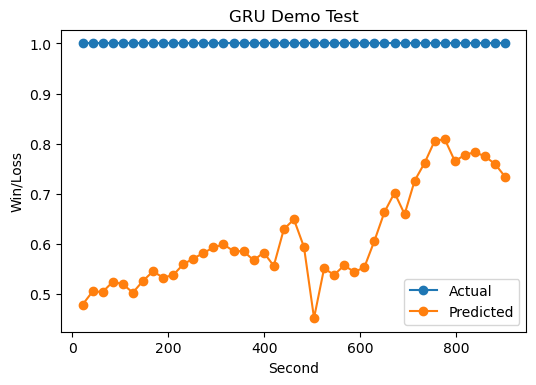

In [27]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, gru_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('GRU Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()